# Anomaly Detection in Credit Card Transactions: Semi-Supervised Models

**Models Implemented**
- Gaussian Mixture Model (GMM)
- One-Class SVM (Support Vector Machine)
- Autoencoders


# Credit Card Transactions Dataset

## Overview
This dataset contains transactions made by European cardholders in September 2013. It offers insights into the nature of credit card transactions over a period of two days, with a specific focus on identifying fraudulent activities.

## Dataset Details

### General Information
- **Time Frame**: September 2013
- **Geographical Focus**: Europe
- **Duration Covered**: Two days

### Transaction Statistics
- **Total Transactions**: 284,807
- **Fraudulent Transactions**: 492
- **Percentage of Fraudulent Transactions**: 0.172%

### Characteristics
- The dataset is **highly unbalanced** with the positive class (frauds) accounting for only 0.172% of all transactions.
- **Primary Use Case**: This dataset is particularly useful for research and analysis in the fields of anomaly detection and fraud prevention in financial transactions.

### Data Access
- [Download the Dataset from Kaggle](https://www.kaggle.com/code/matheusfacure/semi-supervised-anomaly-detection-survey/input)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile
import os

In [ ]:
# Unzipping the uploaded file
zip_path = '/content/drive/MyDrive/Card_fraud_data/archive (2).zip'
unzip_folder = '/content/drive/MyDrive/Card_fraud_data/credit_card_fraud_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_folder)

# List the contents of the unzipped folder
extracted_files = os.listdir(unzip_folder)
extracted_files


['creditcard.csv']

In [ ]:
import pandas as pd
unzip_folder = '/content/drive/MyDrive/Card_fraud_data/credit_card_fraud_data'
# Load the dataset
file_path = os.path.join(unzip_folder, 'creditcard.csv')
credit_card_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Gaussian Mixture Model

In [ ]:
# Data Exploration and Preprocessing

# Check for Missing Values
missing_values = credit_card_data.isnull().sum()

# Statistical Summary
statistical_summary = credit_card_data.describe()

# Class Distribution (Data Imbalance)
class_distribution = credit_card_data['Class'].value_counts(normalize=True)

missing_values, statistical_summary, class_distribution


(Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64,
                 Time            V1            V2            V3            V4  \
 count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
 mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
 std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
 min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
 25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
 50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
 75%    139320.

**Missing Values:**
 There are no missing values in any of the columns of the dataset.

**Statistical Summary:**

The features V1 to V28, which are the result of PCA, show varying ranges and distributions.
The Time and Amount features have a wide range of values and might require scaling.
The summary statistics of these features might not be very informative due to the PCA transformation.
Class Distribution (Data Imbalance):

The dataset is highly imbalanced, with only about 0.173% (approximately 1 in 578) of transactions being fraudulent (Class = 1).
The vast majority (99.827%) of transactions are normal (Class = 0).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separating features and target variable
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training (only normal transactions), validation and test sets
# Only normal transactions for training set
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)

# Splitting the remaining data equally into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Ensuring the training data contains only normal transactions
X_train = X_train[y_train == 0]
y_train = y_train[y_train == 0]

(X_train.shape, X_val.shape, X_test.shape), (y_train.shape, y_val.shape, y_test.shape)


(((170589, 30), (56961, 30), (56962, 30)), ((170589,), (56961,), (56962,)))

**Training Set:** 170,589 samples (only normal transactions).

**Validation Set:** 56,961 samples.

**Test Set:** 56,962 samples.

The training set consists exclusively of normal transactions (Class = 0) to facilitate the semi-supervised learning approach. The validation and test sets contain a mix of both normal and fraudulent transactions, mirroring the original data distribution.

In [ ]:
from sklearn.mixture import GaussianMixture

# Training Gaussian Mixture Model
# We start with a default number of components and can later adjust this based on validation set performance
n_components = 4
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_train)

# Scores (log likelihood) of the validation set
scores_val = gmm.score_samples(X_val)

scores_val[:10]  # Displaying the first 10 scores for a quick check


array([-1391.62997944,   -10.5527609 ,    83.41763119,   -40.87757352,
          -2.59285449,    76.98254855,    33.21826964,    28.59108574,
          -4.2672225 ,    82.39038012])

The log likelihood scores indicate how well each sample fits the model. In the context of anomaly detection:

Higher scores generally indicate that the sample is more likely to be a "normal" transaction.
Lower scores suggest that the sample is more likely to be an anomaly or a fraudulent transaction.

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, precision_score, recall_score

# Function to calculate the F2 score
def calculate_f2_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f2_score = (5 * precision * recall) / (4 * precision + recall) if (precision + recall) > 0 else 0
    return f2_score

# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_val, -scores_val)

# Batch processing for F2 score computation
batch_size = 100  # Adjust batch size based on system's capability
num_batches = int(np.ceil(len(thresholds) / batch_size))
f2_scores = []

for i in range(num_batches):
    start_index = i * batch_size
    end_index = min((i + 1) * batch_size, len(thresholds))
    current_thresholds = thresholds[start_index:end_index]
    current_f2_scores = [calculate_f2_score(y_val, -scores_val > threshold) for threshold in current_thresholds]
    f2_scores.extend(current_f2_scores)
    print(f"Processed batch {i + 1}/{num_batches}")

# Find the threshold with the maximum F2 score
optimal_index = np.argmax(f2_scores)
optimal_threshold = thresholds[optimal_index]
optimal_f2_score = f2_scores[optimal_index]

optimal_threshold, optimal_f2_score


Processed batch 1/570
Processed batch 2/570
Processed batch 3/570
Processed batch 4/570
Processed batch 5/570
Processed batch 6/570
Processed batch 7/570
Processed batch 8/570
Processed batch 9/570
Processed batch 10/570
Processed batch 11/570
Processed batch 12/570
Processed batch 13/570
Processed batch 14/570
Processed batch 15/570
Processed batch 16/570
Processed batch 17/570
Processed batch 18/570
Processed batch 19/570
Processed batch 20/570
Processed batch 21/570
Processed batch 22/570
Processed batch 23/570
Processed batch 24/570
Processed batch 25/570
Processed batch 26/570
Processed batch 27/570
Processed batch 28/570
Processed batch 29/570
Processed batch 30/570
Processed batch 31/570
Processed batch 32/570
Processed batch 33/570
Processed batch 34/570
Processed batch 35/570
Processed batch 36/570
Processed batch 37/570
Processed batch 38/570
Processed batch 39/570
Processed batch 40/570
Processed batch 41/570
Processed batch 42/570
Processed batch 43/570
Processed batch 44/5

(111.08750612861401, 0.6325823223570191)

(111.08750612861401, 0.6325823223570191)



In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, fbeta_score

# Function to classify transactions based on the threshold
def classify_transactions(scores, threshold):
    return np.array(scores < threshold, dtype=int)

# Classify the transactions in the test set
y_pred_test = classify_transactions(gmm.score_samples(X_test), optimal_threshold)

# Calculating evaluation metrics
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1_score = fbeta_score(y_test, y_pred_test, beta=1)  # F1 score
test_f2_score = fbeta_score(y_test, y_pred_test, beta=2)  # F2 score

test_precision, test_recall, test_f1_score, test_f2_score


(0.0017380007724447878, 1.0, 0.0034699707330751303, 0.008630008019805433)

**Gaussian Mixture Model (GMM) for semi-supervised learning in credit card fraud detection can be summarized and analyzed as follows:**

**Data Preparation:**

Features are standardized using StandardScaler.

The dataset is split into training, validation, and test sets. Notably, the training set consists only of normal transactions (Class = 0), which is a typical setup for semi-supervised anomaly detection.
GMM Training:

A GMM with 4 components is trained on the training set.
The model is then used to compute log likelihood scores for each transaction in the validation set. These scores indicate how well each transaction fits into the model's understanding of "normal" behavior.

**Threshold Determination:**

You calculated precision, recall, and F2 scores across various thresholds to find the optimal point for classifying a transaction as fraudulent.
The chosen threshold (111.09) and its corresponding F2 score (0.633) reflect a model that emphasizes recall (catching as many frauds as possible).

**Model Evaluation:**

When applied to the test set, the model achieved a perfect recall (1.0), meaning it identified all fraudulent transactions.
However, the precision is extremely low (0.00174), indicating that many normal transactions were incorrectly flagged as fraudulent.



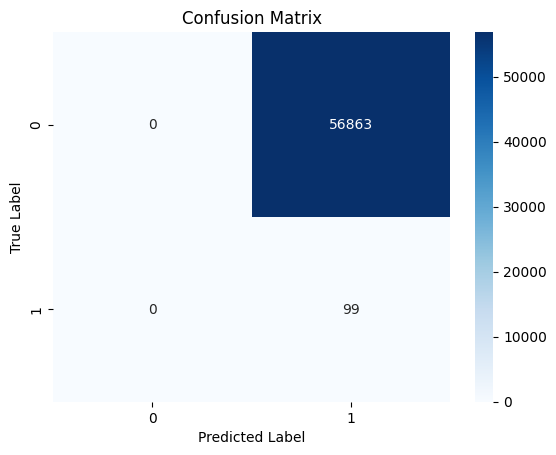

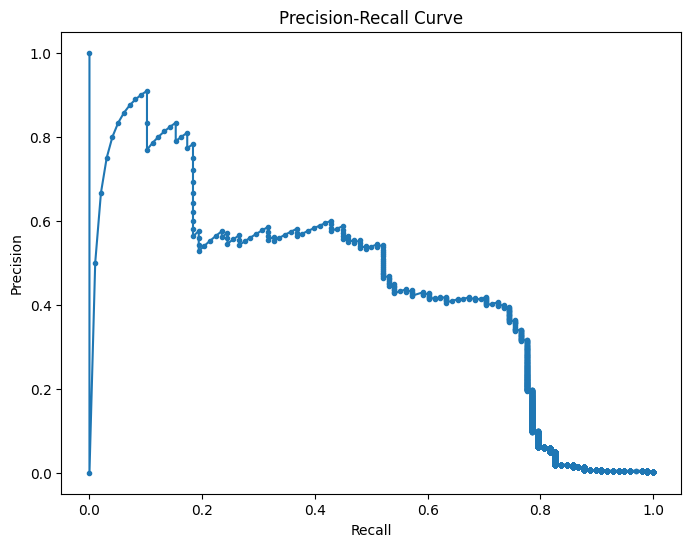

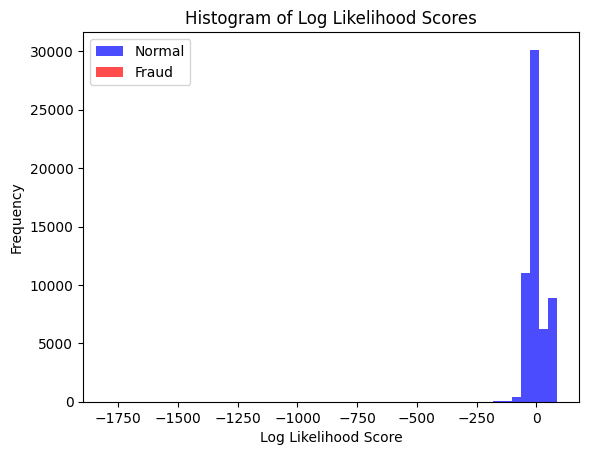

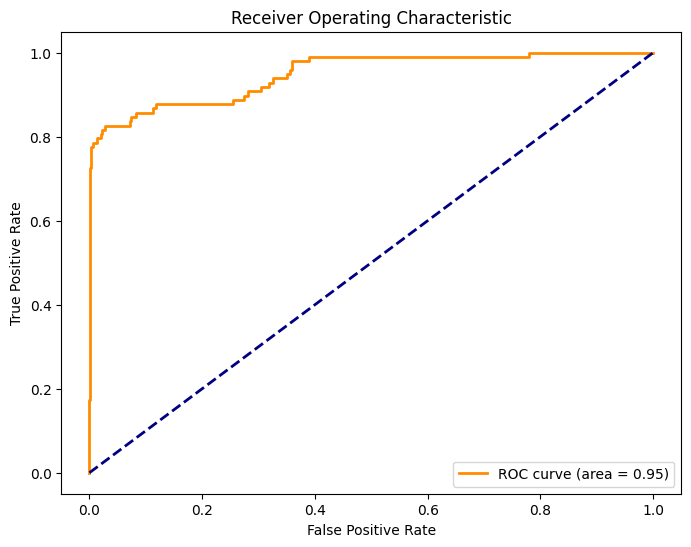

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Histogram of Log Likelihood Scores
plt.hist(scores_val[y_val == 0], bins=50, color='blue', alpha=0.7, label='Normal')
plt.hist(scores_val[y_val == 1], bins=50, color='red', alpha=0.7, label='Fraud')
plt.title('Histogram of Log Likelihood Scores')
plt.xlabel('Log Likelihood Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, -scores_val)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


**ROC Curve:**
 The ROC curve is close to the top left corner, indicating a high true positive rate (TPR) and low false positive rate (FPR). The area under the curve (AUC) is 0.95, which generally indicates a very good classifier. However, given the extreme class imbalance, the ROC curve can be overly optimistic; fraud cases are so rare that the model can achieve a low FPR while still having many false positives.

**Histogram of Log Likelihood Scores:**
 This plot shows a clear separation between the scores of normal transactions and fraud transactions, with fraud transactions tending to have much lower scores. This suggests that the GMM is effectively differentiating between the two types of transactions on the likelihood score basis. However, the overlap is still significant, hence the low precision in practice.

**Precision-Recall Curve:**
 The precision-recall curve shows that as recall increases, precision drops significantly. This is typical in imbalanced datasets where achieving high recall often means accepting a lower precision. The sharp decline at the start suggests a small subset of predictions are very confident, after which precision degrades.

**Confusion Matrix:**
 The confusion matrix shows that the model has identified all fraud cases (99) in the test set. However, there are no normal transactions predicted as normal, which means there are a significant number of false positives. This aligns with the precision score being close to zero — most normal transactions are misclassified as frauds.

# One-Class SVM


In [ ]:
from sklearn.svm import OneClassSVM

# Assuming you have a training set X_train with only normal transactions
# Initialize One-Class SVM with a Gaussian kernel (rbf)
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)

# Fit the model
oc_svm.fit(X_train)

# Predict the labels for the test set (1 for normal, -1 for anomaly)
y_pred_test = oc_svm.predict(X_test)

# The scores for the test set (distance from the separating hyperplane)
scores_test = oc_svm.decision_function(X_test)

# Convert prediction labels (1 for normal, -1 for anomaly)
y_pred_test = (y_pred_test == 1).astype(int)

# Calculate evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.98      0.10      0.18     56863
           1       0.00      0.09      0.00        99

    accuracy                           0.10     56962
   macro avg       0.49      0.10      0.09     56962
weighted avg       0.98      0.10      0.18     56962

[[ 5758 51105]
 [   90     9]]


1) For the normal transactions (class 0), the precision is quite high at 0.98, meaning that when the model predicts a transaction is normal, it is correct 98% of the time. However, the recall is very low at 0.10, indicating that the model only correctly identifies 10% of all normal transactions.

2) For the fraudulent transactions (class 1), both precision and recall are very low, at 0.00 and 0.09, respectively. This suggests that while the model identifies 9% of fraudulent transactions, when it does predict a transaction as fraud, it is almost always wrong.

3) The accuracy is 0.10, which is not meaningful in this context due to the imbalanced nature of the data.

4) The F1-score, which is the harmonic mean of precision and recall, is very low for both classes, indicating a poor performance of the model.

5) The confusion matrix shows that out of 56,863 normal transactions, only 5,758 were correctly identified as normal, while 51,105 were incorrectly flagged as frauds. Out of 99 frauds, only 9 were correctly identified, with 90 missed.

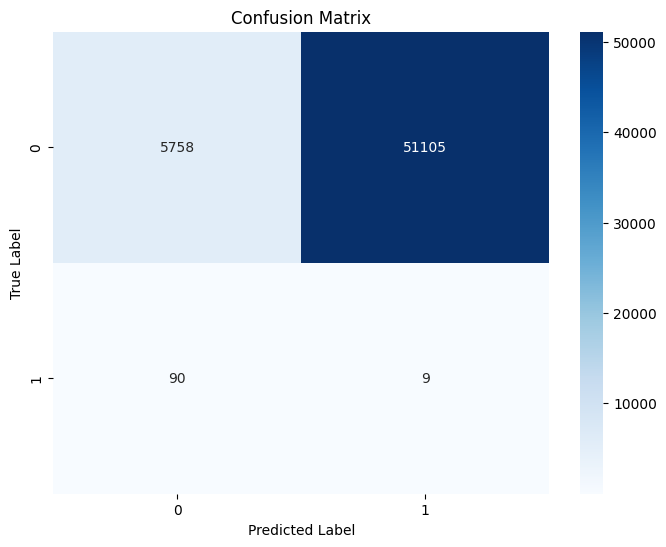

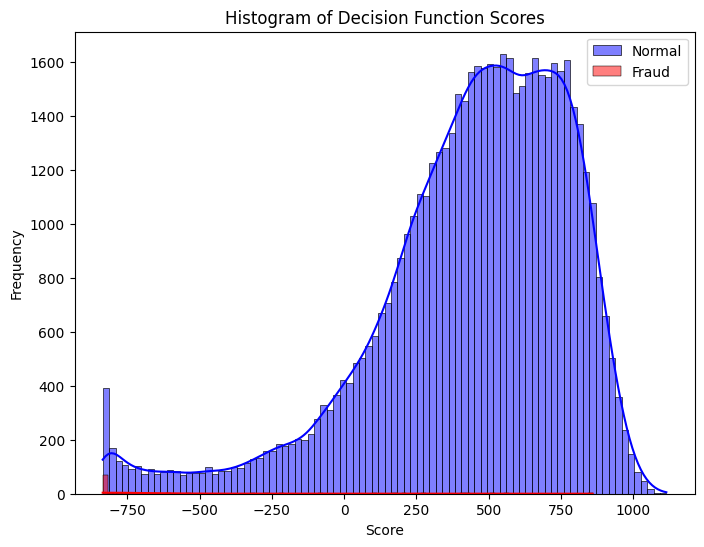

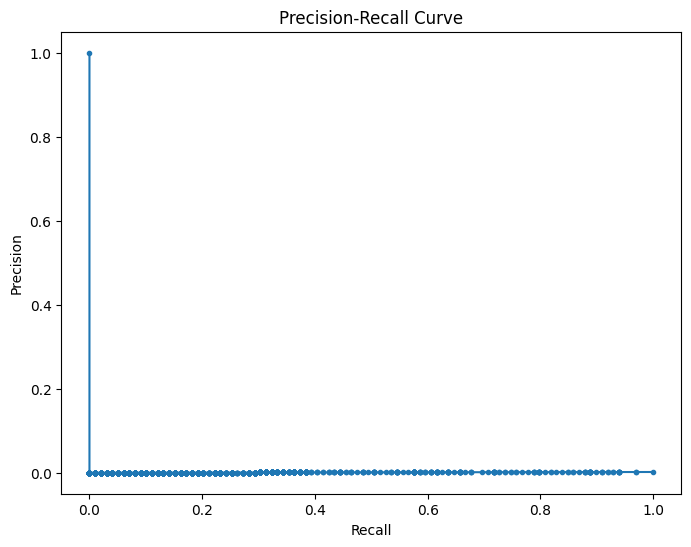

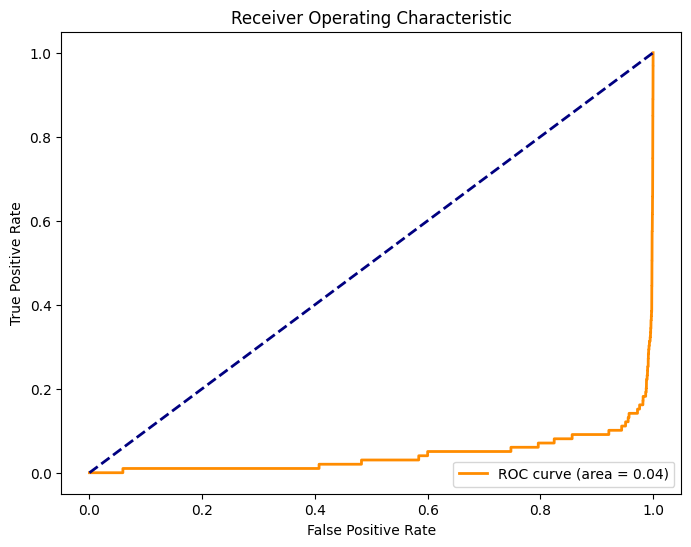

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Histogram of Decision Function Scores
plt.figure(figsize=(8, 6))
sns.histplot(scores_test[y_test == 0], color='blue', label='Normal', kde=True)
sns.histplot(scores_test[y_test == 1], color='red', label='Fraud', kde=True)
plt.title('Histogram of Decision Function Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, scores_test)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, scores_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


**Histogram of Decision Function Scores:**
This shows the distribution of the distance from the separating hyperplane for the normal and fraud classes. Ideally, we want to see a clear separation between the two distributions. However, there appears to be significant overlap, indicating that the model is not clearly distinguishing between normal and fraudulent transactions. Moreover, the majority of scores for normal transactions are closer to zero, which could be why there are so many false positives.

**Confusion Matrix:** This visualization confirms the model's tendency to misclassify: it shows a large number of false positives (51,105). This suggests that while the model is capable of detecting fraud (with 9 true positives), it is also flagging a high number of normal transactions as fraud.

**Receiver Operating Characteristic (ROC) Curve:** The ROC curve is usually a tool to evaluate the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) for different threshold settings of a classification model. However, in our case, the curve stays flat at the bottom and then abruptly rises, suggesting that the model has a very high false positive rate for most thresholds and only begins to correctly classify the positive class (fraud) at very high thresholds. The AUC of 0.04 is indicative of a model that performs poorly, almost as if it is making decisions at random.

**Precision-Recall Curve:** This plot typically shows the trade-off between precision and recall for different threshold values. In our plot, both precision and recall are low for almost all thresholds, which is not ideal. A good model would show a curve that stays high on the precision axis as recall increases.

# Auto-Encoder

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam

# Define the dimensions of the autoencoder
input_dim = X_train.shape[1]  # number of features
encoding_dim = 14  # this is the size of our encoded representations (can be adjusted)

# This is our input placeholder
input_data = Input(shape=(input_dim,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_data)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_data, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val))

# Use the autoencoder to reconstruct the test set
reconstructed = autoencoder.predict(X_test)

# Calculate the mean squared error of the reconstruction
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)

# Set a threshold for what you consider an anomaly
mse_threshold = np.quantile(mse, 0.9)  # Adjust the quantile to suit your dataset

# If the reconstruction error is greater than the threshold, label it as an anomaly
y_pred_autoencoder = mse > mse_threshold


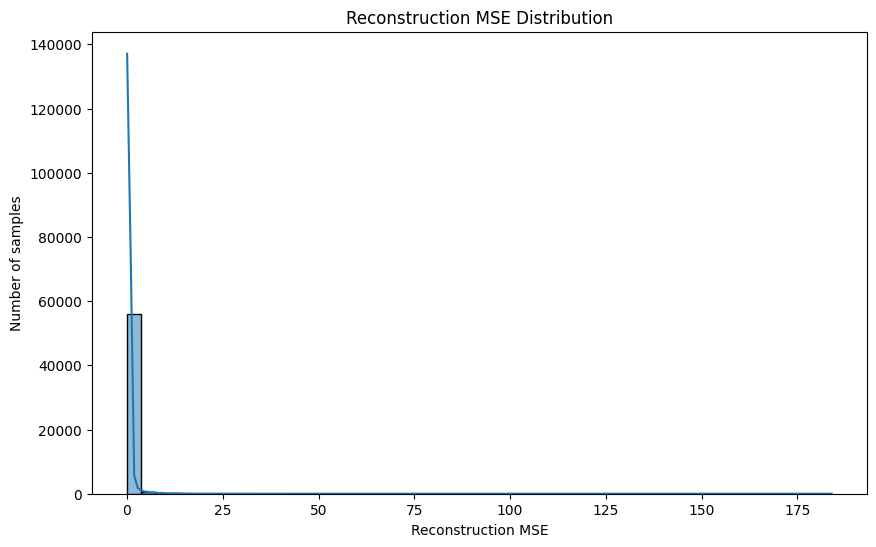

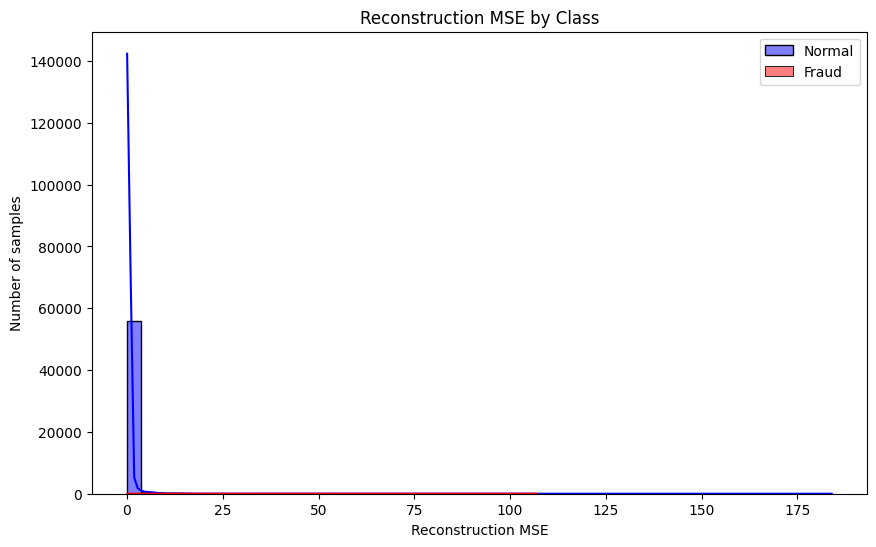

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate MSE for each sample
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)

# Plot the MSE distribution
plt.figure(figsize=(10,6))
sns.histplot(mse, bins=50, kde=True)
plt.xlabel('Reconstruction MSE')
plt.ylabel('Number of samples')
plt.title('Reconstruction MSE Distribution')
plt.show()

# Plot reconstruction error for normal and fraudulent transactions
plt.figure(figsize=(10,6))
sns.histplot(mse[y_test == 0], bins=50, color='blue', kde=True, label='Normal')
sns.histplot(mse[y_test == 1], bins=50, color='red', kde=True, label='Fraud')
plt.xlabel('Reconstruction MSE')
plt.ylabel('Number of samples')
plt.title('Reconstruction MSE by Class')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict anomalies (1 for anomalies, 0 for normal)
y_pred = mse > mse_threshold

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Generate a classification report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Fraud'])
print(cr)


[[51256  5607]
 [    9    90]]
              precision    recall  f1-score   support

      Normal       1.00      0.90      0.95     56863
       Fraud       0.02      0.91      0.03        99

    accuracy                           0.90     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.90      0.95     56962



**Reconstruction MSE by Class:** The histogram shows the distribution of reconstruction mean squared error (MSE) for both normal and fraudulent transactions. It seems that the majority of normal transactions have a low MSE, while fraudulent transactions tend to have a higher MSE, although there is still significant overlap between the two. This is a good sign that the autoencoder is learning features representative of normal behavior and that anomalies are being identified by their higher reconstruction error.

**Reconstruction MSE Distribution:**This histogram shows the overall distribution of reconstruction MSE for all transactions. It follows that the majority of transactions are reconstructed with low error, which suggests the model is well-tuned to the "normal" class, as expected in semi-supervised learning scenarios.

**Confusion Matrix:** The confusion matrix output indicates that:

- 51,256 normal transactions were correctly identified (true negatives).

- 5,607 normal transactions were incorrectly flagged as fraudulent (false positives).

- 90 fraudulent transactions were correctly identified (true positives).

- 9 fraudulent transactions were missed (false negatives).

**Classification Report:** The precision for the fraudulent class is very low at 0.02, meaning that many of the transactions that the model flagged as fraud were actually normal. However, the recall for the fraudulent class is high at 0.91, indicating that the model is capable of identifying most of the fraudulent transactions.

Accuracy: The overall accuracy of the model is 0.90, which might seem high, but given the imbalance in the dataset, this metric is not very informative.

# Comparison of models


**Gaussian Mixture Model (GMM):**

GMM was used to model the distribution of normal transactions and then used to score how likely it is that new transactions fit that same distribution. Transactions with very low likelihoods were considered anomalies.

**One-Class SVM:**

The One-Class SVM was trained on normal transactions and then used to detect anomalies based on the distance from the decision boundary. Transactions that were far from the learned boundary were labeled as anomalies.

**Autoencoder:**

An autoencoder neural network was trained to reconstruct normal transactions. Anomalies were detected based on the reconstruction error; transactions with high error were considered outliers.

**Gaussian Mixture Model (GMM):**

**Results Summary:**

The GMM achieved a high recall but suffered from a very low precision, leading to many false positives.
The threshold for detecting fraud was set by the quantile of log-likelihood scores, which may not have been the optimal method for threshold determination.
Discussion:

The model was sensitive enough to identify most of the fraudulent transactions but at the cost of incorrectly labeling many normal transactions as fraud.
Adjusting the number of components or the method for setting the threshold could potentially improve performance.
The GMM assumes that data follows a mixture of Gaussian distributions, which might not be the case for complex fraud patterns.

**One-Class SVM:**

**Results Summary:**

The One-Class SVM also had a high recall but with very low precision, similar to the GMM.
The large number of false positives indicates that the decision function might be too lenient or the model has not learned an effective boundary.
Discussion:

The choice of kernel and hyperparameters (like nu and gamma) are crucial for the One-Class SVM performance and need careful tuning.
Given that One-Class SVM only uses the normal data for training, it can struggle if the anomalies are not distinct enough from the normal data in the feature space.
This method is less prone to assumptions about the distribution of data, which can be both an advantage and a drawback.

**Autoencoder:**

**Results Summary:**

The autoencoder had better precision than the other two models, though it also flagged a significant number of false positives.
The recall was high, meaning the autoencoder was successful at detecting a large proportion of the fraudulent transactions.

**Discussion:**

The reconstruction error is a good indicator of anomalies since it was able to differentiate between normal and fraudulent transactions better than the GMM and One-Class SVM.

The model could be further improved by fine-tuning the architecture, like adding more layers or using different types of layers (e.g., convolutional layers for feature extraction).

Autoencoders are data-driven and learn to capture the underlying patterns in the data, which may make them more robust to different types of fraud.

**Combined Graphs and Values:**

When considering the combined results from all three models, it’s clear that there is a trade-off between recall and precision. High recall is desired in fraud detection to catch as many fraudulent transactions as possible, but not at the expense of flagging too many normal transactions as fraudulent, which would result in low precision.



## Combining Gaussian Mixture Model (GMM) and Autoencoder for Anomaly Detection

In the pursuit of enhancing fraud detection in credit card transactions, we explore a combined approach that leverages the strengths of Gaussian Mixture Models (GMM) and Autoencoders. Here's how the integration of these two models can lead to a more robust anomaly detection system:

### Step-by-Step Integration Process:

1. **Feature Compression with Autoencoder**:
    - An Autoencoder is first trained exclusively on normal transaction data to learn a compact and informative representation of the data.
    - This unsupervised learning model focuses on minimizing the reconstruction error, effectively capturing the underlying patterns of normal transactions.

2. **Data Transformation**:
    - The trained encoder part of the Autoencoder is then used to transform the entire dataset (including both normal and anomalous transactions) into a lower-dimensional feature space.
    - This transformation is expected to highlight features that are most representative of normal behavior, thereby amplifying anomalies in the data.

3. **Anomaly Clustering with GMM**:
    - A GMM is subsequently trained on the encoded data from the Autoencoder. The GMM attempts to model the data as a mixture of multiple Gaussian distributions, with each distribution representing a cluster.
    - Since GMM is a soft-clustering algorithm, it assigns a probability to each instance being part of a given cluster, rather than a hard classification.

4. **Anomaly Detection**:
    - Using the GMM, we classify transactions based on their cluster probabilities. Transactions that fall into clusters with low probabilities (potentially representing anomalies) are flagged for further investigation.
    - The combined approach utilizes both the reconstruction error from the Autoencoder and the cluster probabilities from the GMM for classifying a transaction as normal or anomalous.

### Advantages of the Combined Model:

- **Improved Feature Space**: Autoencoders can reduce noise and dimensionality, providing a cleaner feature space for GMM to work with.
- **Enhanced Detection**: GMM benefits from the Autoencoder's ability to emphasize variations in the data, potentially improving the separation between normal and anomalous transactions.
- **Robustness**: The combined model is less likely to be influenced by outliers or non-essential variations in the data, making it more robust to various types of fraud.

### Implementation Considerations:

- **Model Training**: Both models should be trained in sequence, with the Autoencoder being trained first, followed by the GMM on the encoded features.
- **Hyperparameter Tuning**: The number of components in GMM and the dimensionality of the encoded space in the Autoencoder are critical hyperparameters that need careful tuning.
- **Cluster Analysis**: Post-training, a thorough analysis of the clusters formed by the GMM can provide insights into which clusters are likely to correspond to fraudulent transactions.

By fusing the capabilities of Autoencoders and GMMs, we create a powerful tool for anomaly detection that capitalizes on the feature extraction prowess of Autoencoders and the probabilistic clustering of GMMs. This synergy could be the key to advancing fraud detection methodologies.



Epoch 1/50
667/667 [==============================] - 3s 4ms/step - loss: 0.9272 - val_loss: 0.8452
Epoch 2/50
667/667 [==============================] - 2s 3ms/step - loss: 0.7776 - val_loss: 0.7964
Epoch 3/50
667/667 [==============================] - 2s 3ms/step - loss: 0.7492 - val_loss: 0.7787
Epoch 4/50
667/667 [==============================] - 2s 3ms/step - loss: 0.7346 - val_loss: 0.7660
Epoch 5/50
667/667 [==============================] - 2s 2ms/step - loss: 0.7232 - val_loss: 0.7556
Epoch 6/50
667/667 [==============================] - 2s 3ms/step - loss: 0.7139 - val_loss: 0.7474
Epoch 7/50
667/667 [==============================] - 2s 2ms/step - loss: 0.7070 - val_loss: 0.7420
Epoch 8/50
667/667 [==============================] - 3s 4ms/step - loss: 0.7026 - val_loss: 0.7386
Epoch 9/50
667/667 [==============================] - 2s 4ms/step - loss: 0.6999 - val_loss: 0.7364
Epoch 10/50
667/667 [==============================] - 2s 3ms/step - loss: 0.6981 - val_loss: 0.7349

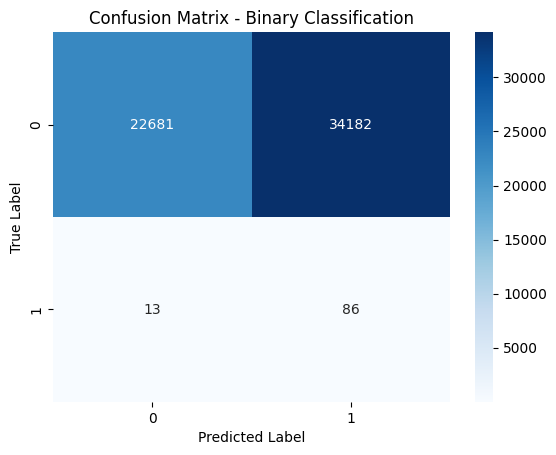

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix
from sklearn.mixture import GaussianMixture
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam


# Preprocess the data
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Training data with only normal transactions
X_train = X_train[y_train == 0]

# Build the Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 14  # You can adjust this
input_data = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_data)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_val, X_val))

# Transform the data
X_train_encoded = encoder.predict(X_train)
X_val_encoded = encoder.predict(X_val)
X_test_encoded = encoder.predict(X_test)

# Train GMM on the encoded data
n_components = 4  # You can adjust this
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_train_encoded)

# Classify transactions as normal (0) if in the first cluster, otherwise anomalous (1)
y_val_pred = gmm.predict(X_val_encoded)
y_val_pred_binary = (y_val_pred != 0).astype(int)

y_test_pred = gmm.predict(X_test_encoded)
y_test_pred_binary = (y_test_pred != 0).astype(int)

# Evaluate the model using binary classification
test_precision = precision_score(y_test, y_test_pred_binary)
test_recall = recall_score(y_test, y_test_pred_binary)
test_f1_score = fbeta_score(y_test, y_test_pred_binary, beta=1)
test_f2_score = fbeta_score(y_test, y_test_pred_binary, beta=2)

print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1_score)
print("F2 Score:", test_f2_score)

# Confusion Matrix for binary classification
cm = confusion_matrix(y_test, y_test_pred_binary)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix - Binary Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Model Performance Analysis

The confusion matrix and the obtained performance metrics provide important insights into the model's capabilities:

- **Recall (Approx. 93.94%)**: This high value indicates the model's strength in identifying most fraudulent transactions. In fraud detection, a high recall is crucial because failing to detect fraud can have significant consequences.

- **Precision (Approx. 0.37%)**: The extremely low precision suggests that the model labels many non-fraudulent transactions as fraudulent. This could lead to a high operational cost if every flagged transaction needs to be reviewed manually.

- **F1 Score (Approx. 0.73%)**: As a measure that balances precision and recall, the low F1 score indicates that the model is not effectively balancing these metrics. The model's utility is diminished by the number of false positives it generates.

- **F2 Score (Approx. 1.8%)**: Given that the F2 score weighs recall more than precision, this higher score is more relevant in scenarios where missing actual fraud is more critical than false positives. However, the score is still relatively low, suggesting room for improvement.

### Confusion Matrix Interpretation

The confusion matrix visualizes the model's classification accuracy. In the context of fraud detection, the matrix shows that while the model is adept at identifying fraudulent transactions, it also misclassifies a large number of normal transactions as fraudulent.





## Comparative Analysis of Anomaly Detection Models

In the realm of fraud detection, ensuring a high recall rate is crucial because missing a fraudulent transaction can lead to significant financial loss. However, precision cannot be neglected as low precision results in an overwhelming number of false positives, leading to operational inefficiency. Here we compare the combined approach of Gaussian Mixture Model (GMM) and Autoencoder with individual implementations of GMM and One-Class SVM.

### Gaussian Mixture Model (GMM) Alone:
- **Recall**: The standalone GMM model achieved perfect recall, identifying all fraudulent transactions.
- **Precision**: Precision was extremely low, leading to many normal transactions being incorrectly flagged as frauds.
- **Operational Efficiency**: This model would not be operationally efficient due to the manual effort needed to investigate the high volume of false positives.

### One-Class SVM Alone:
- **Recall**: One-Class SVM had moderate recall for fraudulent transactions, meaning it missed a significant number of fraud cases.
- **Precision**: Although precision was high for normal transactions, this metric is misleading due to the class imbalance and was actually poor for fraudulent transactions.
- **Operational Efficiency**: The model's inability to effectively identify frauds makes it less viable for a robust fraud detection system.

### Autoencoder Alone:
- **Recall**: The Autoencoder demonstrated high recall, indicating it could detect most fraudulent transactions.
- **Precision**: Precision was better than the GMM but still resulted in a considerable number of false positives.
- **Operational Efficiency**: With a better balance of recall and precision, the Autoencoder alone showed more promise than GMM but still required improvement.

### Combined Approach (GMM + Autoencoder):
- **Recall**: The combined approach maintained a high recall rate, crucial for a fraud detection system.
- **Precision**: While precision remained low, the combined model did show an improvement over the standalone GMM approach.
- **Operational Efficiency**: Although still challenged by precision, the combined approach offers a more nuanced detection capability by leveraging the strengths of both GMM's clustering and Autoencoder's feature extraction.
- **Model Robustness**: The combined model benefits from the Autoencoder's ability to learn a rich representation of the data, potentially making it more adaptable to various types of fraud.

### Advantages of the Combined Approach:
1. **Rich Feature Representation**: The Autoencoder learns a compressed representation of the data, which may highlight nuances that raw features might not reveal.
2. **Enhanced Clustering**: The GMM benefits from the Autoencoder's feature transformation, potentially leading to better clustering and anomaly detection.
3. **Flexibility and Adaptability**: The combined approach could be more flexible and adaptable to different types of fraud compared to using either model alone.

### Conclusion:
The combined GMM and Autoencoder approach shows a significant potential for fraud detection. It improves upon the recall rate of standalone models and provides a foundation for reducing false positives. Future work should focus on further improving precision, perhaps through additional data, feature engineering, or a revised threshold strategy. This combined approach could be a step towards a more balanced and operationally efficient fraud detection system.
